In [ ]:
pip install xlsxwriter

In [ ]:
import numpy as np
import pandas as pd 
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import xlsxwriter

Total Data : 6990
other : 4047
tender : 1164
scared : 137
angry : 373
excited : 146
sad : 181
happy : 457
wonder : 485


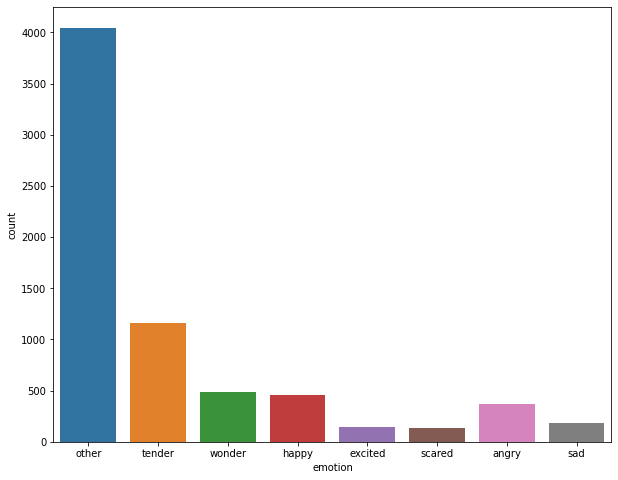

In [ ]:
data = pd.read_excel("/content/labeled.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

other = data.loc[data['emotion'] == 'other', 'after stopword'].copy().reset_index(drop=True)
tender = data.loc[data['emotion'] == 'tender', 'after stopword'].copy().reset_index(drop=True)
scared = data.loc[data['emotion'] == 'scared', 'after stopword'].copy().reset_index(drop=True)
angry = data.loc[data['emotion'] == 'angry', 'after stopword'].copy().reset_index(drop=True)
excited = data.loc[data['emotion'] == 'excited', 'after stopword'].copy().reset_index(drop=True)
sad = data.loc[data['emotion'] == 'sad', 'after stopword'].copy().reset_index(drop=True)
happy = data.loc[data['emotion'] == 'happy', 'after stopword'].copy().reset_index(drop=True)
wonder = data.loc[data['emotion'] == 'wonder', 'after stopword'].copy().reset_index(drop=True)

print("Total Data :", len(data))
print("other :", len(other))
print("tender :", len(tender))
print("scared :", len(scared))
print("angry :", len(angry))
print("excited :", len(excited))
print("sad :", len(sad))
print("happy :", len(happy))
print("wonder :", len(wonder))

plt.figure(figsize=(10,8))
sns.countplot(x='emotion', data=data)
plt.show()

Class 0: 4047
Class 1: 1164
Class 2: 137
Class 3: 373
Class 4: 146
Class 5: 181
Class 6: 457
Class 7: 485


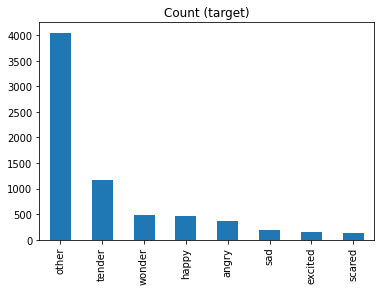

<Figure size 720x576 with 0 Axes>

In [ ]:
target_count_sent = data.emotion.value_counts()
print('Class 0:', target_count_sent["other"])
print('Class 1:', target_count_sent["tender"])
print('Class 2:', target_count_sent["scared"])
print('Class 3:', target_count_sent["angry"])
print('Class 4:', target_count_sent["excited"])
print('Class 5:', target_count_sent["sad"])
print('Class 6:', target_count_sent["happy"])
print('Class 7:', target_count_sent["wonder"])


target_count_sent.plot(kind='bar', title='Count (target)');
plt.figure(figsize=(10,8))
plt.show()

In [ ]:
data["emotion"].value_counts()

other      4047
tender     1164
wonder      485
happy       457
angry       373
sad         181
excited     146
scared      137
Name: emotion, dtype: int64

In [ ]:
count_class_0_sent, count_class_1_sent, count_class_2_sent = data.label.value_counts()

df_class_0_sent = data[data['emotion'] == "other"]
df_class_1_sent = data[data['emotion'] == "tender"]
df_class_2_sent = data[data['emotion'] == "scared"]
df_class_3_sent = data[data['emotion'] == "angry"]
df_class_4_sent = data[data['emotion'] == "excited"]
df_class_5_sent = data[data['emotion'] == "sad"]
df_class_6_sent = data[data['emotion'] == "happy"]
df_class_7_sent = data[data['emotion'] == "wonder"]

Random over-sampling:
other      3000
tender     2000
wonder     1500
angry      1500
happy      1500
scared     1000
excited    1000
sad        1000
Name: emotion, dtype: int64


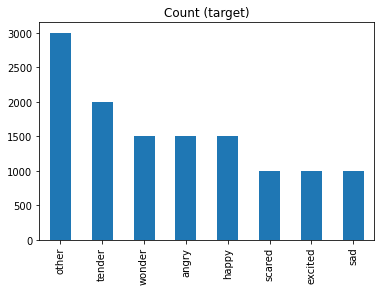

In [ ]:
df_class_0_over_sent = df_class_0_sent.sample(3000, replace=True, random_state=1)
df_class_1_over_sent = df_class_1_sent.sample(2000, replace=True, random_state=1)
df_class_2_over_sent = df_class_2_sent.sample(1000, replace=True, random_state=1)
df_class_3_over_sent = df_class_3_sent.sample(1500, replace=True, random_state=1)
df_class_4_over_sent = df_class_4_sent.sample(1000, replace=True, random_state=1)
df_class_5_over_sent = df_class_5_sent.sample(1000, replace=True, random_state=1)
df_class_6_over_sent = df_class_6_sent.sample(1500, replace=True, random_state=1)
df_class_7_over_sent = df_class_7_sent.sample(1500, replace=True, random_state=1)
df_test_over_sent = pd.concat([df_class_0_over_sent, df_class_1_over_sent, df_class_2_over_sent, 
                               df_class_3_over_sent, df_class_4_over_sent, df_class_5_over_sent,
                               df_class_6_over_sent, df_class_7_over_sent], axis=0)

print('Random over-sampling:')
print(df_test_over_sent.emotion.value_counts())

df_test_over_sent.emotion.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, GRU, Bidirectional
from keras.callbacks import EarlyStopping
from keras import initializers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cols_sent = ['emotion','after stopword']
d_sent = df_test_over_sent[cols_sent]
d_sent = d_sent[d_sent['after stopword'].notnull()]

In [ ]:
d_sent.reset_index(drop=True,inplace=True)
x_sent = d_sent.iloc[:, 1].values
y_sent = d_sent.iloc[:, 0].values
print(np.unique(y_sent, return_counts=True))

(array(['angry', 'excited', 'happy', 'other', 'sad', 'scared', 'tender',
       'wonder'], dtype=object), array([1500, 1000, 1500, 3000, 1000, 1000, 2000, 1500]))


In [ ]:
from tensorflow.keras import utils as np_utils

In [ ]:
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
text_sent = d_sent['after stopword'].values
maxlen_sent = max([len(i.split()) for i in text_sent])

x_sent = tokenizer.texts_to_sequences(x_sent)
x_sent = sequence.pad_sequences(x_sent, maxlen_sent, padding="post")
vocab_sent = 48805
print(x_sent)

[[   1  555    7 ...    0    0    0]
 [5785   96   32 ...    0    0    0]
 [ 229  318 2596 ...    0    0    0]
 ...
 [ 471    1  736 ...    0    0    0]
 [4520 1001  908 ...    0    0    0]
 [  16 1533   67 ...    0    0    0]]


In [ ]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
print("vocab sentiment : " + str(vocab_sent))
print("maxlen sentiment : " + str(maxlen_sent))

vocab sentiment : 48805
maxlen sentiment : 23


In [ ]:
from tensorflow.keras import utils as np_utils

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y_sent = LabelEncoder()
y_sent = labelencoder_Y_sent.fit_transform(y_sent)
print(y_sent)
print(np.unique(y_sent, return_counts=True))

[3 3 3 ... 7 7 7]
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([1500, 1000, 1500, 3000, 1000, 1000, 2000, 1500]))


In [ ]:
print(y_sent)

[3 3 3 ... 7 7 7]


In [ ]:
from tensorflow.keras import utils as np_utils
y_sent = np_utils.to_categorical(y_sent, num_classes= 8)
# One hot encoded
print(y_sent)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train_sent, x_test_sent, y_train_sent, y_test_sent, indices_train_sent, indices_test_sent = train_test_split(x_sent, y_sent, d_sent.index, test_size=0.2, random_state=42)

print(x_train_sent.shape)
print(y_train_sent.shape)
print(x_test_sent.shape)
print(y_test_sent.shape)
print(y_sent)

(10000, 23)
(10000, 8)
(2500, 23)
(2500, 8)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
x_train_sent = sequence.pad_sequences(x_train_sent, maxlen=maxlen_sent, padding="post")
x_test_sent = sequence.pad_sequences(x_test_sent, maxlen=maxlen_sent, padding="post")
print('x_train_sent shape:', x_train_sent.shape)
print('x_test_sent shape:', x_test_sent.shape)

x_train_sent shape: (10000, 23)
x_test_sent shape: (2500, 23)


In [ ]:
text = data['after stopword'].values

In [ ]:
vocab = 48805

In [ ]:
vocab

48805

In [ ]:
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) 

In [ ]:
from keras.engine.topology import Layer
from keras import regularizers, constraints
import keras.backend as K


def dot_product(x, kernel):
  """
  Wrapper for dot product operation, in order to be compatible with both
  Theano and Tensorflow
  Args:
      x (): input
      kernel (): weights
  Returns:
  """
  if K.backend() == 'tensorflow':
      return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
  else:
      return K.dot(x, kernel)

class AttentionWithContext(Layer):
  def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

  def get_config(self):
    config = super().get_config().copy()
    config.update({
            'W_regularizer': self.W_regularizer,
            'u_regularizer': self.u_regularizer,
            'b_regularizer': self.b_regularizer,
            'W_constraint': self.W_constraint,
            'u_constraint': self.u_constraint,
            'b_constraint': self.b_constraint,
            'bias': self.bias,
    })
    return config
    
  def build(self, input_shape):
      assert len(input_shape) == 3

      self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                initializer=self.init,
                                name='{}_W'.format(self.name),
                                regularizer=self.W_regularizer,
                                constraint=self.W_constraint)
      if self.bias:
          self.b = self.add_weight(shape=(input_shape[-1],),
                                    initializer='zero',
                                    name='{}_b'.format(self.name),
                                    regularizer=self.b_regularizer,
                                    constraint=self.b_constraint)

      self.u = self.add_weight(shape=(input_shape[-1],),
                                initializer=self.init,
                                name='{}_u'.format(self.name),
                                regularizer=self.u_regularizer,
                                constraint=self.u_constraint)

      super(AttentionWithContext, self).build(input_shape)

  def compute_mask(self, input, input_mask=None):
      # do not pass the mask to the next layers
      return None

  def call(self, x, mask=None):
      uit = dot_product(x, self.W)

      if self.bias:
          uit += self.b

      uit = K.tanh(uit)
      ait = dot_product(uit, self.u)

      a = K.exp(ait)

      # apply mask after the exp. will be re-normalized next
      if mask is not None:
          # Cast the mask to floatX to avoid float64 upcasting in theano
          a *= K.cast(mask, K.floatx())

      # in some cases especially in the early stages of training the sum may be almost zero
      # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
      # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
      a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

      a = K.expand_dims(a)
      weighted_input = x * a
      return K.sum(weighted_input, axis=1)

  def compute_output_shape(self, input_shape):
      return input_shape[0], input_shape[-1]

In [ ]:
def get_model(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = 23, embeddings_initializer = initializer))
    model.add(Bidirectional(LSTM(64, recurrent_initializer = initializer, 
                                 kernel_initializer = initializer, recurrent_dropout=0.1,
                                 dropout=0.5, return_sequences = True, activation = "tanh")))
    model.add(AttentionWithContext())
    model.add(Dense(8, activation='softmax', kernel_initializer = initializer)) 
    adam = Adam(lr=0.0005)
    nadam = Nadam(lr=0.00005)
    rms = RMSprop(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    print(model.summary())
  
    return model


In [ ]:
from keras.optimizers import Adam, Nadam, RMSprop

In [ ]:
model = get_model(x_train_sent, y_train_sent)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 128)           6247040   
_________________________________________________________________
bidirectional (Bidirectional (None, 23, 128)           98816     
_________________________________________________________________
attention_with_context (Atte (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 8)                 1032      
Total params: 6,363,528
Trainable params: 6,363,528
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


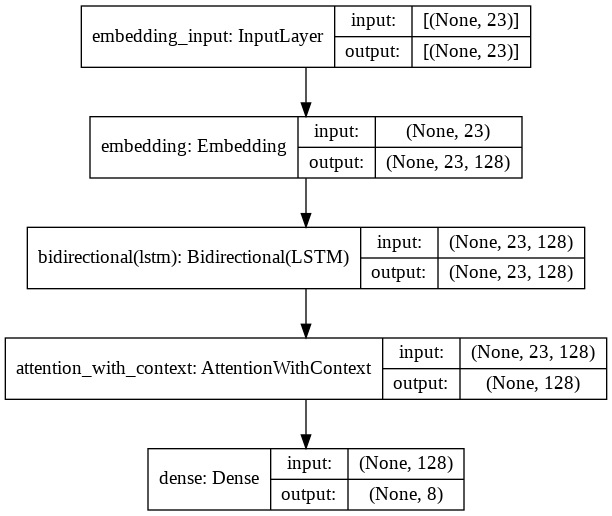

In [ ]:
import keras as keras
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train_sent, y_train_sent, batch_size=64, epochs=10, verbose=1, validation_split=0.2,  callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])


Epoch 1/10
125/125 [==============================] - 30s 181ms/step - loss: 1.9754 - accuracy: 0.2425 - val_loss: 1.5434 - val_accuracy: 0.4135
Epoch 2/10
125/125 [==============================] - 20s 164ms/step - loss: 1.4071 - accuracy: 0.4617 - val_loss: 1.2079 - val_accuracy: 0.5470
Epoch 3/10
125/125 [==============================] - 21s 164ms/step - loss: 1.0159 - accuracy: 0.6179 - val_loss: 0.8827 - val_accuracy: 0.7245
Epoch 4/10
125/125 [==============================] - 20s 163ms/step - loss: 0.6872 - accuracy: 0.7692 - val_loss: 0.6766 - val_accuracy: 0.8050
Epoch 5/10
125/125 [==============================] - 20s 163ms/step - loss: 0.4611 - accuracy: 0.8567 - val_loss: 0.5414 - val_accuracy: 0.8585
Epoch 6/10
125/125 [==============================] - 20s 163ms/step - loss: 0.3288 - accuracy: 0.9046 - val_loss: 0.4999 - val_accuracy: 0.8745
Epoch 7/10
125/125 [==============================] - 20s 162ms/step - loss: 0.2353 - accuracy: 0.9360 - val_loss: 0.4210 - val_ac

In [ ]:
_, acc = model.evaluate(x_test_sent, y_test_sent, verbose=0)
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 91.76 %


In [ ]:
new_review_category = model.predict_classes(x_test_sent)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
decode_sent = np.argmax(y_test_sent, axis=1)
lab_sent = ['angry', 'excited', 'happy', 'other', 'sad', 'scared', 'tender',
       'wonder']


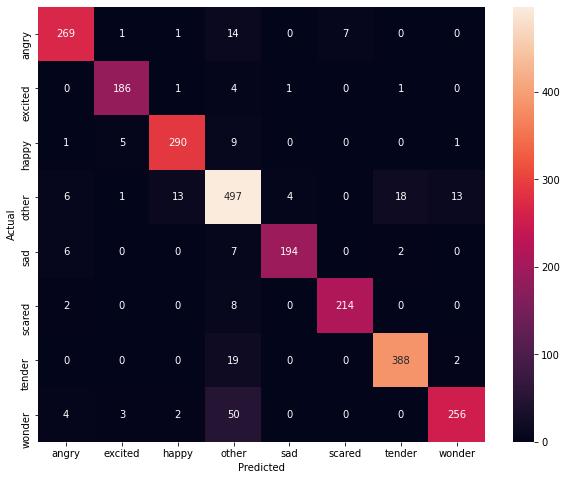

In [ ]:
from sklearn.metrics import confusion_matrix
def conf_matrix(Y_act, Y_pred, lab):
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

conf_matrix(new_review_category, decode_sent, lab_sent)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category, decode_sent)

0.9176

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category, decode_sent))
print('F1 score:', f1_score(new_review_category, decode_sent, average='macro'))
print('Recall:', recall_score(new_review_category, decode_sent, average='macro'))
print('Precision:', precision_score(new_review_category, decode_sent, average='macro'))

Accuracy: 0.9176
F1 score: 0.9275765552682382
Recall: 0.9222473326440989
Precision: 0.9347623597916754


In [ ]:
accr_sent = model.evaluate(x_test_sent,y_test_sent)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_sent[0],accr_sent[1]))

79/79 [==============================] - 1s 12ms/step - loss: 0.3423 - accuracy: 0.9176
Test set
  Loss: 0.342
  Accuracy: 0.918


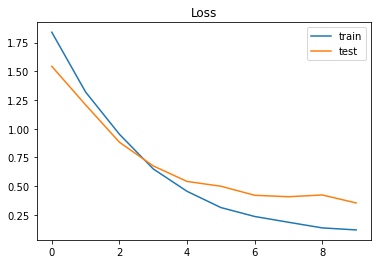

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

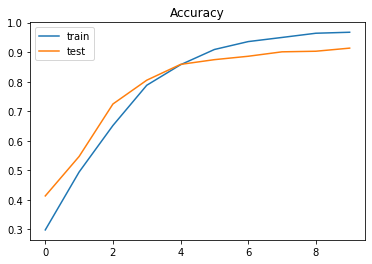

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
model.save('/content/attention blstm 9176.h5')


# Labeling Data

In [ ]:
unlabeled = pd.read_excel("/content/unlabeled.xlsx")

In [ ]:
unlabeled = pd.read_csv("/content/tanggal 15 after dup.csv")

In [ ]:
un_text = unlabeled['after stopword'].values

In [ ]:
un_text

array(['kalo lebaran tahun depan gue enggak mudik lama lama gue bisa kali diangkat jadi duta anti mudik nasional kemenhub',
       'ampoooon kediri vibesssss lama banget enggak kediri',
       'nekat mudik ingat anda bisa kena hukuman bulan penjara', ...,
       'kenapa bisa om ku lolos rumah nenek kan aku mau menjemput thr tertunda gr enggak boleh mudik om lolos',
       'padahal mudik pakai prokes bisa kan daripada sumpek padat kayak begini',
       'mau posting foto keluarga pas lebaran sebagian orang keluarganya enggak lengkap atau enggak bisa'],
      dtype=object)

In [ ]:
cols = ['after stopword']
d_aspect = unlabeled[cols]

d_aspect=d_aspect[d_aspect['after stopword'].notnull()]
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.values
x_aspect = d_aspect.iloc[:, 0].values

In [ ]:
d_aspect

,after stopword
0,kalo lebaran tahun depan gue enggak mudik lama...
1,ampoooon kediri vibesssss lama banget enggak k...
2,nekat mudik ingat anda bisa kena hukuman bulan...
3,pertahanan keamanan kita dipecundangi tka
4,kawan jm mendekati masa mudik hari raya idul f...
...,...
11274,tenang kena cvd mudik kok
11275,wkwk padahal larangan mudik kata apa jokowi
11276,kenapa bisa om ku lolos rumah nenek kan aku ma...
11277,padahal mudik pakai prokes bisa kan daripada s...


In [ ]:
x_aspect

array(['kalo lebaran tahun depan gue enggak mudik lama lama gue bisa kali diangkat jadi duta anti mudik nasional kemenhub',
       'ampoooon kediri vibesssss lama banget enggak kediri',
       'nekat mudik ingat anda bisa kena hukuman bulan penjara', ...,
       'kenapa bisa om ku lolos rumah nenek kan aku mau menjemput thr tertunda gr enggak boleh mudik om lolos',
       'padahal mudik pakai prokes bisa kan daripada sumpek padat kayak begini',
       'mau posting foto keluarga pas lebaran sebagian orang keluarganya enggak lengkap atau enggak bisa'],
      dtype=object)

In [ ]:
d_aspect.replace('', np.nan, inplace=True)
d_aspect.dropna(inplace=True)

d_aspect.reset_index(drop=True,inplace=True)

x_aspect = d_aspect.values

len(x_aspect)

11279

In [ ]:
x_aspect

array([['kalo lebaran tahun depan gue enggak mudik lama lama gue bisa kali diangkat jadi duta anti mudik nasional kemenhub'],
       ['ampoooon kediri vibesssss lama banget enggak kediri'],
       ['nekat mudik ingat anda bisa kena hukuman bulan penjara'],
       ...,
       ['kenapa bisa om ku lolos rumah nenek kan aku mau menjemput thr tertunda gr enggak boleh mudik om lolos'],
       ['padahal mudik pakai prokes bisa kan daripada sumpek padat kayak begini'],
       ['mau posting foto keluarga pas lebaran sebagian orang keluarganya enggak lengkap atau enggak bisa']],
      dtype=object)

In [ ]:
tokenizer = Tokenizer()
text_aspect = d_aspect['after stopword'].values
maxlen_aspect = 23
tokenizer.fit_on_texts(un_text)

In [ ]:
x_aspect = tokenizer.texts_to_sequences(un_text)
x_aspect = sequence.pad_sequences(x_aspect, 23, padding="post")
vocab_aspect = 48805

In [ ]:
text1 = tokenizer.texts_to_sequences(un_text)
text1 = pad_sequences(text1, maxlen=23, padding="post")

In [ ]:
text1

array([[  10,    7,   25, ...,    0,    0,    0],
       [6037, 1693, 6038, ...,    0,    0,    0],
       [ 121,    1,  273, ...,    0,    0,    0],
       ...,
       [  70,    8,  380, ...,    0,    0,    0],
       [  89,    1,  118, ...,    0,    0,    0],
       [  16, 2304,  280, ...,    0,    0,    0]], dtype=int32)

In [ ]:
pred_label = model.predict(text1)
label1 = np.argmax(pred_label, axis = 1) 

In [ ]:
pred_label

array([[2.9441594e-09, 3.6534533e-04, 9.9330634e-01, ..., 4.8616031e-09,
        5.0509314e-04, 4.0161343e-05],
       [4.1233172e-05, 7.8308440e-06, 1.3746121e-06, ..., 1.0687098e-06,
        3.3614240e-05, 6.8998590e-05],
       [3.0682405e-04, 2.3268133e-04, 4.2286544e-08, ..., 9.6934521e-01,
        2.9677000e-02, 2.5850150e-07],
       ...,
       [3.7834018e-01, 1.2911159e-03, 8.0607936e-07, ..., 5.1239139e-04,
        1.3615965e-04, 6.7341467e-03],
       [3.1507798e-03, 1.6361749e-01, 3.1546750e-03, ..., 1.2359370e-01,
        9.0586387e-02, 1.9925774e-05],
       [5.9504394e-04, 3.9174033e-06, 1.4654121e-04, ..., 4.1129607e-07,
        4.8345896e-06, 9.8323846e-01]], dtype=float32)

In [ ]:
label1

array([2, 3, 5, ..., 3, 4, 7])

In [ ]:
workbook = xlsxwriter.Workbook('/content/tanggal 15 after dup labeled emotion 9164.xlsx')
worksheet = workbook.add_worksheet()


row = 0
col = 0

rowHeaders = ['tweet', 'label']
worksheet.write_row(row, col,  tuple(rowHeaders))


for i in un_text:
    tweet = i
    rowValues = [tweet]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))

row = 0
for l in label1:
    label = l
    rowValues = [label]
    row += 1 
    worksheet.write_row(row, col + 1, tuple(rowValues))

workbook.close()